전력 사용량 예측 AI 경진대회
--

전력 | 한국에너지공단 | 시계열 | SMAPE


train.csv :
train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
1시간 단위로 제공
전력사용량(kWh) 포함
train.shape: (122400, 10)


test.csv :
test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
전력사용량(kWh) 미포함
test.shape: (10080, 9)




sample_submission.csv :
sample_submission 데이터
sample_submission.shape: (10080, 2)


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

In [2]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)
df_sample_submission=pd.DataFrame(sample_submission)

In [3]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [4]:
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


시간칼럼 분류
--

In [6]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [7]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
 10  time        122400 non-null  int32         
 11  month_day   122400 non-null  int32         
 12  month       122400 non-null  int32         
 13  date        122400 non-null  int32         
 14  hour        122400 non-null  int32         
 15  day         122400 non-null  object        
dtypes:

description

- num: 건물번호
- date_time: 시간
- 전력사용량(kWh)
- 전력사용량(kWh)  
- 기온(°C)     
- 풍속(m/s)    
- 습도(%)       
- 강수량(mm)  
- 일조(hr)    
- 비전기냉방설비운영   
- 태양광보유      

In [9]:
df_train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,70789.147059,707.776471,6.929412,14.835294,11.500000
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,7871.284093,78.712810,0.793925,8.446192,6.922215
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,60100.000000,601.000000,6.000000,1.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,62205.750000,622.000000,6.000000,8.000000,5.750000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,71311.500000,713.000000,7.000000,15.000000,11.500000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,80317.250000,803.000000,8.000000,22.000000,17.250000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,82423.000000,824.000000,8.000000,31.000000,23.000000


In [10]:
df_train.isna().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
time          0
month_day     0
month         0
date          0
hour          0
day           0
dtype: int64

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        3360 non-null   float64       
 3   풍속(m/s)       3360 non-null   float64       
 4   습도(%)         3360 non-null   float64       
 5   강수량(mm, 6시간)  1680 non-null   float64       
 6   일조(hr, 3시간)   3360 non-null   float64       
 7   비전기냉방설비운영     2296 non-null   float64       
 8   태양광보유         1624 non-null   float64       
 9   time          10080 non-null  int32         
 10  month_day     10080 non-null  int32         
 11  month         10080 non-null  int32         
 12  date          10080 non-null  int32         
 13  hour          10080 non-null  int32         
 14  day           10080 non-null  object        
dtypes: datetime64[ns](1), float64(7), in

In [12]:
df_test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0,10080.000000,10080.000000,10080.0,10080.000000,10080.00000
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0,200.129683,2.000099,0.0,2.000099,6.92253
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0,82500.000000,825.000000,8.0,25.000000,0.00000
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0,82617.750000,826.000000,8.0,26.000000,5.75000
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0,83005.250000,830.000000,8.0,30.000000,17.25000
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0,83123.000000,831.000000,8.0,31.000000,23.00000


In [13]:
df_test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
time               0
month_day          0
month              0
date               0
hour               0
day                0
dtype: int64

In [14]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_date_time  10080 non-null  object
 1   answer         10080 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.6+ KB


In [16]:
df_sample_submission.iloc[0]

num_date_time    1 2020-08-25 00
answer                         0
Name: 0, dtype: object

In [18]:
i=0
company_num=[]

for i in range(0,10080):
    company=df_sample_submission.iloc[i].str.split('2020').str[0].values[0]
    company_num.append(company)
    i+=1

In [19]:
company_num=pd.Series(company_num)

In [20]:
df_sample_submission['num']=company_num
df_sample_submission

,num_date_time,answer,num
0,1 2020-08-25 00,0,1
1,1 2020-08-25 01,0,1
2,1 2020-08-25 02,0,1
3,1 2020-08-25 03,0,1
4,1 2020-08-25 04,0,1
...,...,...,...
10075,60 2020-08-31 19,0,60
10076,60 2020-08-31 20,0,60
10077,60 2020-08-31 21,0,60
10078,60 2020-08-31 22,0,60


In [21]:
i=0
time_d=[]

for i in range(0,10080):
    t1=len(df_sample_submission.iloc[i].str.split('2020').str[0].values[0])
    t2=df_sample_submission.iloc[i, 0][t1:]
    time_d.append(t2)
    i+=1

In [22]:
time_d=pd.Series(time_d)
df_sample_submission['time']=time_d
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


In [23]:
df_sample_submission.num.unique()

array(['1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', '11 ',
       '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ',
       '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ',
       '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ',
       '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ',
       '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ',
       '57 ', '58 ', '59 ', '60 '], dtype=object)

In [24]:
df_sample_submission.time.unique()

array(['2020-08-25 00', '2020-08-25 01', '2020-08-25 02', '2020-08-25 03',
       '2020-08-25 04', '2020-08-25 05', '2020-08-25 06', '2020-08-25 07',
       '2020-08-25 08', '2020-08-25 09', '2020-08-25 10', '2020-08-25 11',
       '2020-08-25 12', '2020-08-25 13', '2020-08-25 14', '2020-08-25 15',
       '2020-08-25 16', '2020-08-25 17', '2020-08-25 18', '2020-08-25 19',
       '2020-08-25 20', '2020-08-25 21', '2020-08-25 22', '2020-08-25 23',
       '2020-08-26 00', '2020-08-26 01', '2020-08-26 02', '2020-08-26 03',
       '2020-08-26 04', '2020-08-26 05', '2020-08-26 06', '2020-08-26 07',
       '2020-08-26 08', '2020-08-26 09', '2020-08-26 10', '2020-08-26 11',
       '2020-08-26 12', '2020-08-26 13', '2020-08-26 14', '2020-08-26 15',
       '2020-08-26 16', '2020-08-26 17', '2020-08-26 18', '2020-08-26 19',
       '2020-08-26 20', '2020-08-26 21', '2020-08-26 22', '2020-08-26 23',
       '2020-08-27 00', '2020-08-27 01', '2020-08-27 02', '2020-08-27 03',
       '2020-08-27 04', '

EDA
--

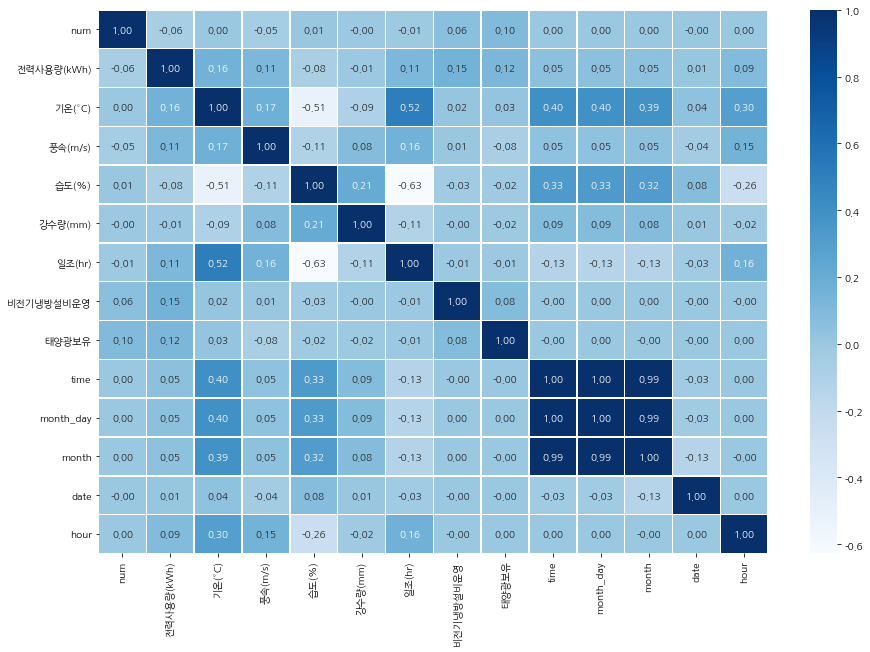

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [29]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

시간과 전력사용량 관계
--

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'month')]

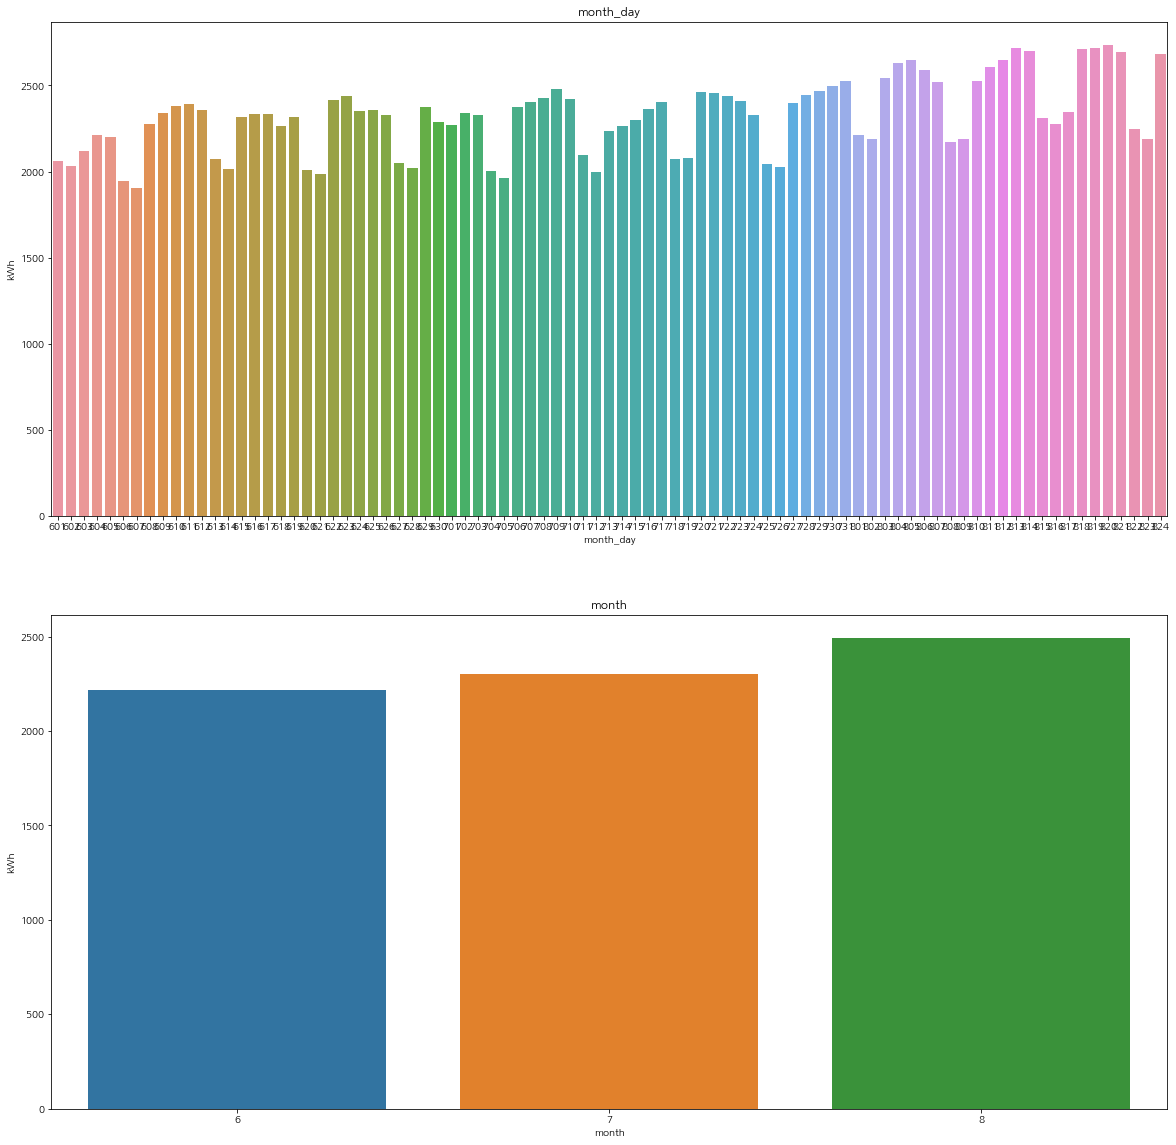

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

md=df_train.groupby('month_day')['전력사용량(kWh)'].mean().reset_index()
m=df_train.groupby('month')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=md, x="month_day", y='전력사용량(kWh)', ax=ax1)

sns.barplot(data=m, x="month", y='전력사용량(kWh)', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="month_day")
ax2.set(ylabel='kWh', title ="month")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

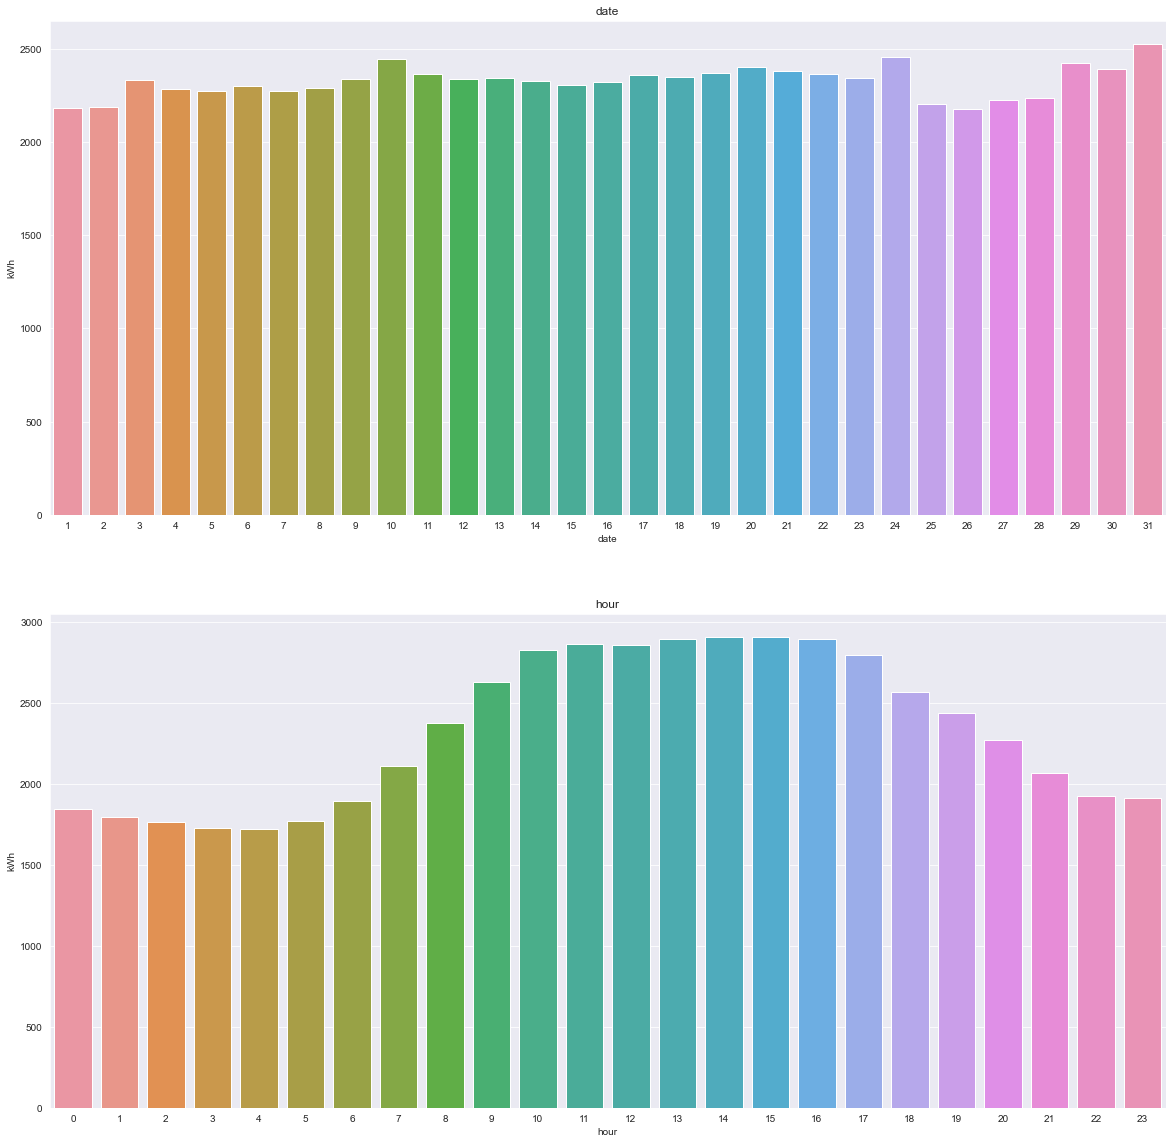

In [31]:
import seaborn as sns

figure, ( (ax3), (ax4)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

date=df_train.groupby('date')['전력사용량(kWh)'].mean().reset_index()
h=df_train.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=date, x="date", y='전력사용량(kWh)', ax=ax3)

sns.barplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax4)

ax3.set(ylabel='kWh', title ="date")
ax4.set(ylabel='kWh', title ="hour")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'day')]

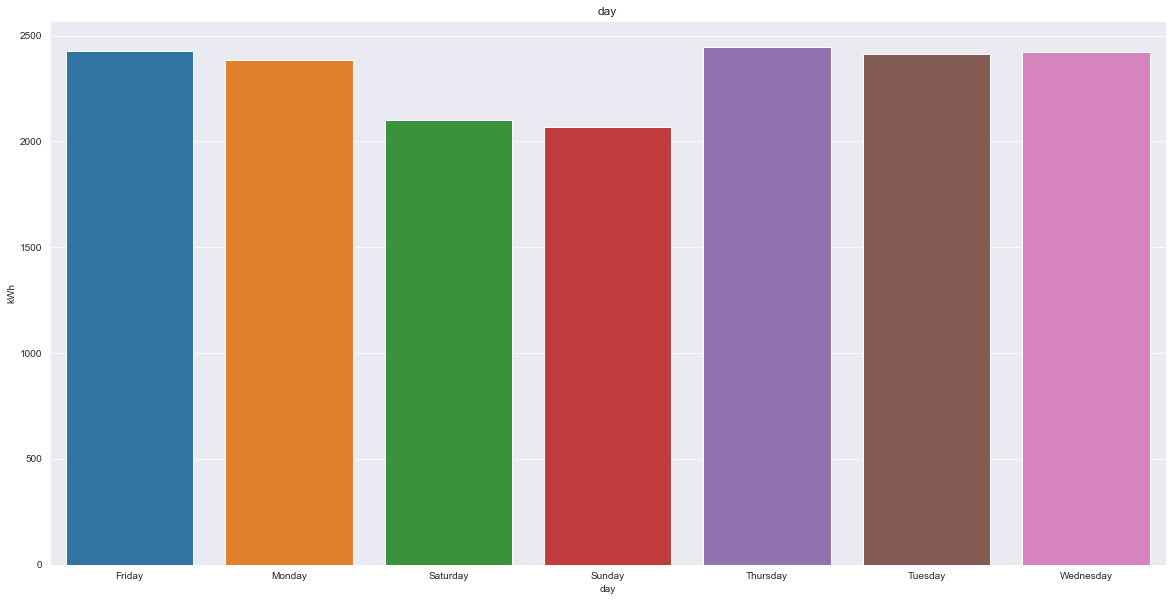

In [32]:
import seaborn as sns

figure, (ax5) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

day=df_train.groupby('day')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=day, x="day", y='전력사용량(kWh)', ax=ax5)

sns.set_style("darkgrid")
ax5.set(ylabel='kWh', title ="day")

<AxesSubplot:xlabel='month_day', ylabel='전력사용량(kWh)'>

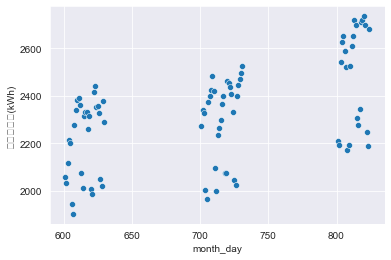

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(md.month_day, md['전력사용량(kWh)'])

기온과 전력사용량 관계
--

In [39]:
tem=df_train.groupby(['기온(°C)'])['전력사용량(kWh)' ].mean().reset_index()
tem

,기온(°C),전력사용량(kWh)
0,11.1,672.624
1,11.2,848.880
2,11.3,721.224
3,11.7,482.220
4,11.8,473.364
...,...,...
240,35.6,1767.312
241,35.7,1554.282
242,35.8,1748.304
243,36.0,1505.088


<AxesSubplot:xlabel='기온(°C)', ylabel='전력사용량(kWh)'>

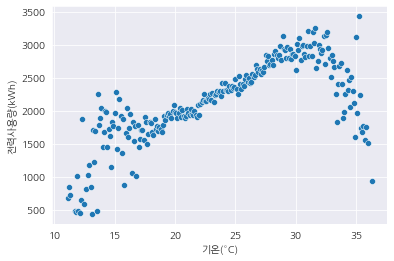

In [44]:
plt.rcParams['font.family'] = 'NanumGothic'

sns.scatterplot(tem['기온(°C)'],tem['전력사용량(kWh)'])

비전기냉방설비운영과 전력사용량 관계
--

In [41]:
Non_electric_cooling_equipment=df_train.groupby(['비전기냉방설비운영'])['전력사용량(kWh)' ].mean().reset_index()
Non_electric_cooling_equipment

,비전기냉방설비운영,전력사용량(kWh)
0,0.0,1868.722163
1,1.0,2536.198313


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and Non_electric_cooling_equipment')]

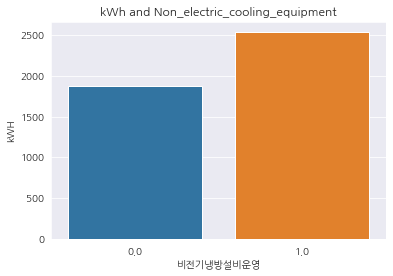

In [45]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)

plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=Non_electric_cooling_equipment, x='비전기냉방설비운영', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and Non_electric_cooling_equipment')

태양광보유와 전력사용량 관계
--

In [46]:
sunlight=df_train.groupby(['태양광보유'])['전력사용량(kWh)' ].mean().reset_index()
sunlight

,태양광보유,전력사용량(kWh)
0,0.0,2093.135722
1,1.0,2572.504986


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and sunlight')]

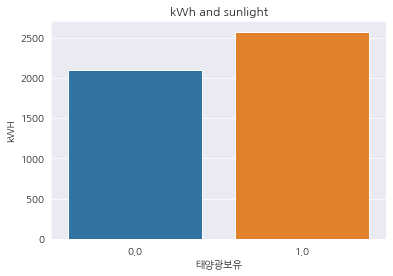

In [47]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=sunlight, x='태양광보유', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and sunlight')

나머지 변수들의 상관관계
--

건물번호와 전력사용량 관계
--

In [81]:
building_num=df_train.groupby(['num'])['전력사용량(kWh)'].sum().reset_index()

[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'num and kWh')]

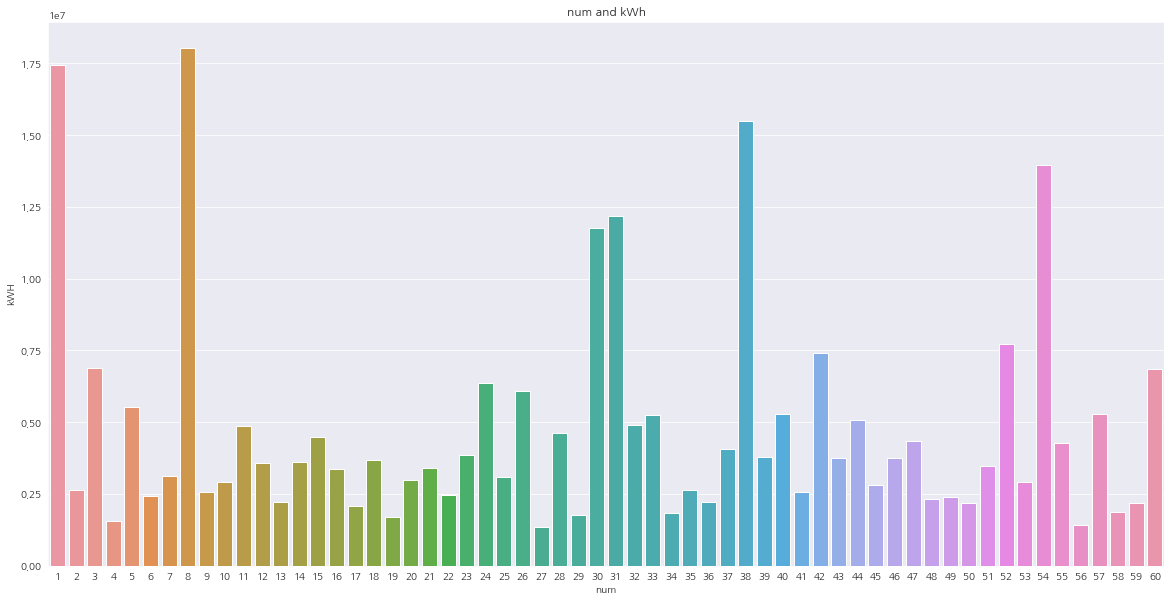

In [82]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=building_num, x='num', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='num and kWh')

날짜와 시간 기준
--

In [48]:
tn1=df_train.groupby(['time'])['풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)','전력사용량(kWh)'].mean().reset_index()

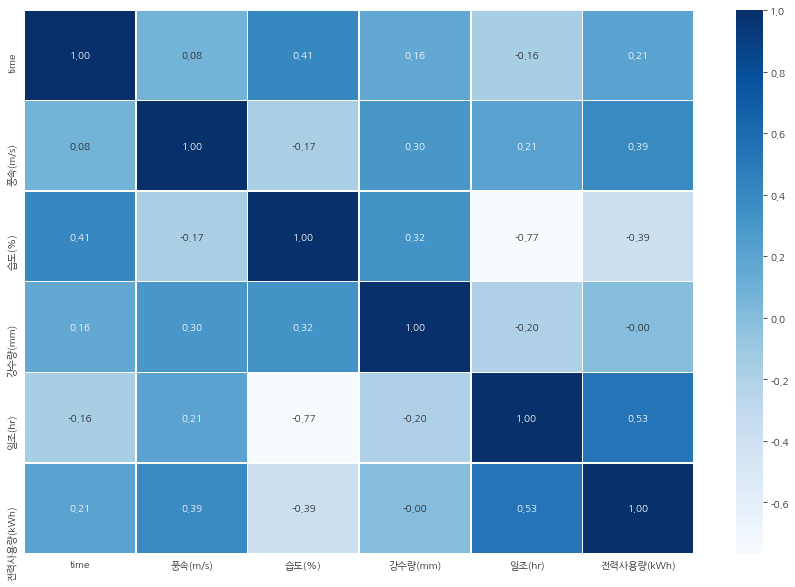

In [49]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=tn1.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

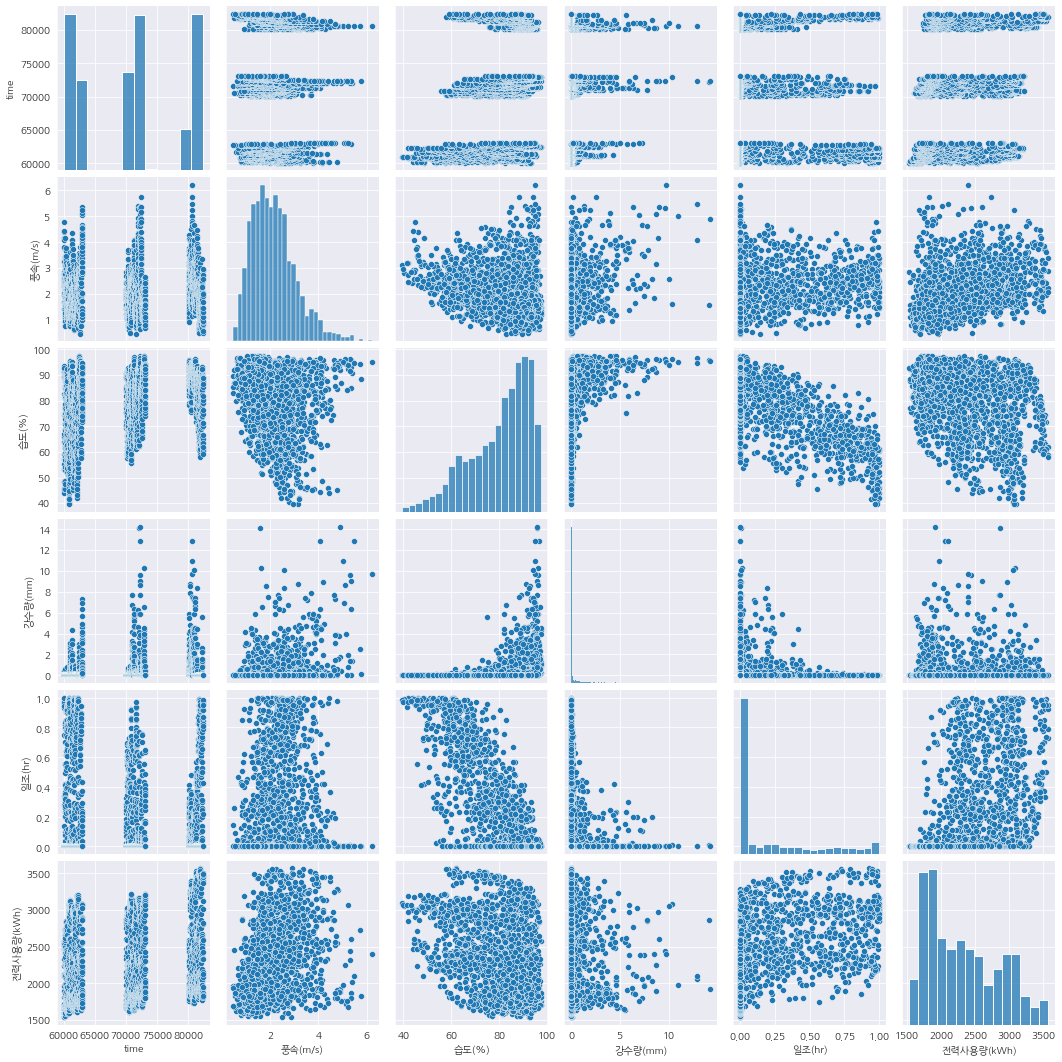

In [50]:
sns.pairplot(tn1)
plt.rcParams['font.family'] = 'NanumGothic'

회사별로 비교해보기
--

In [66]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [68]:
num_info=df_train.groupby(['num'])['기온(°C)','전력사용량(kWh)','풍속(m/s)','습도(%)','강수량(mm)',  '비전기냉방설비운영', '태양광보유'].mean().reset_index()
num_info.head()

,num,기온(°C),전력사용량(kWh),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유
0,1,24.608578,8543.273488,2.345980,75.971569,0.493873,0.0,0.0
1,2,23.623333,1299.914365,3.197990,81.113725,0.720098,1.0,0.0
2,3,24.241275,3371.353699,1.937402,82.667157,0.540882,1.0,1.0
3,4,25.143627,763.997353,2.056324,71.136275,0.393186,1.0,1.0
4,5,23.623333,2714.509694,3.197990,81.113725,0.720098,1.0,0.0


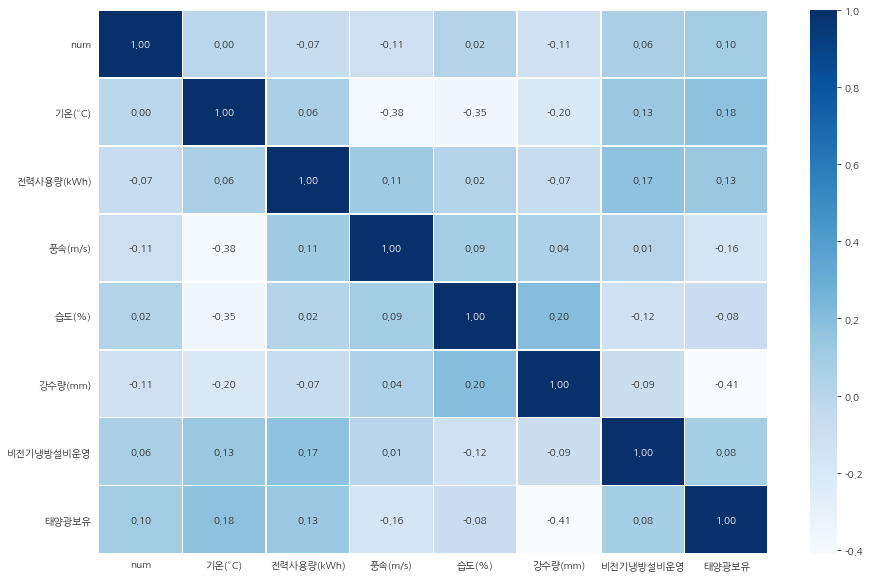

In [83]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=num_info.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

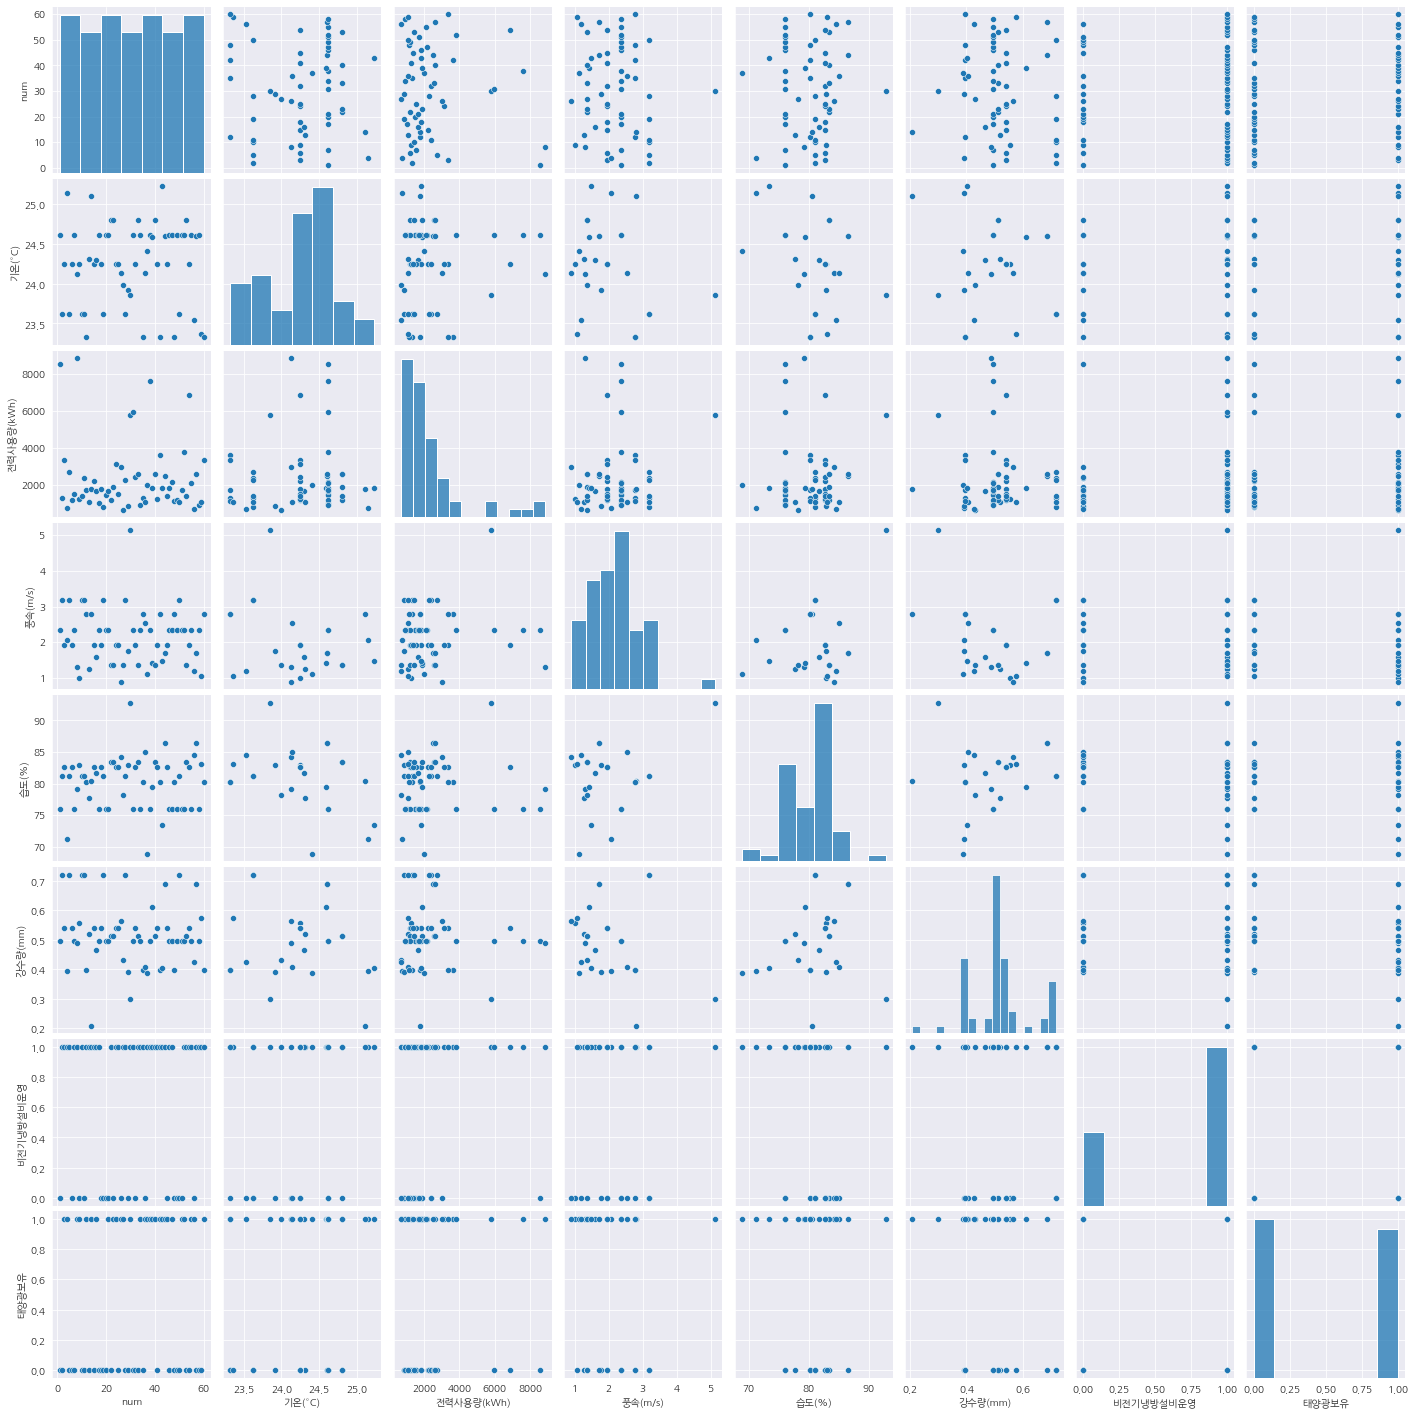

In [80]:
sns.pairplot(num_info)
plt.rcParams['font.family'] = 'NanumGothic'

Pivot table을 이용하여 y 데이터 만들기
--

In [251]:
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


In [239]:
pv_table=pd.pivot_table(df_train, index='num'  , columns='time'  , values='전력사용량(kWh)')
pv_table=pv_table.fillna(0)
pv_table.head()

time,60100,60101,60102,60103,60104,60105,60106,60107,60108,60109,...,82414,82415,82416,82417,82418,82419,82420,82421,82422,82423
num,,,,,,,,,,,,,,,,,,,,,
1,8179.056,8135.640,8107.128,8048.808,8043.624,8010.576,7978.176,8019.000,8020.944,8083.152,...,8782.344,8782.344,8775.216,8762.256,8747.352000,8714.952000,8740.224000,8730.504000,8725.96800,8705.232000
2,977.184,966.168,972.972,965.844,971.676,972.648,1041.336,1187.136,1394.820,1533.168,...,2011.716,2001.024,1971.216,1864.944,1711.044000,1353.348000,1260.036000,1214.028000,1126.22400,1107.432000
3,3183.624,3171.636,3175.740,3194.856,3198.528,3177.468,3215.268,3236.760,3266.352,3291.840,...,3600.288,3579.768,3578.688,3578.337,3576.587341,3572.334982,3571.432457,3569.301794,3549.66049,3465.782444
4,339.552,387.504,203.472,186.192,185.760,196.560,204.336,221.184,288.576,500.688,...,1086.480,1215.648,1130.976,1120.608,857.952000,729.648000,700.272000,569.376000,375.40800,340.416000
5,3063.744,3147.120,3098.736,3047.760,3111.696,2730.240,2541.456,2275.344,2644.704,2823.552,...,3128.976,3142.368,3108.672,3078.432,2754.864000,3439.152000,3510.432000,3458.160000,3421.00800,3355.344000


In [240]:
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


- 8/25일부터 0시부터 8/31일 23시까지를 맞추어야 한다.
- 총 168시간의 전력사용량을 맞추어야 하는데,
- 각 회사별로 맞추어야 한다.

In [241]:
pv_table.columns

Int64Index([60100, 60101, 60102, 60103, 60104, 60105, 60106, 60107, 60108,
            60109,
            ...
            82414, 82415, 82416, 82417, 82418, 82419, 82420, 82421, 82422,
            82423],
           dtype='int64', name='time', length=2040)

Train 데이터의 y_train 데이터 만들기
--

In [242]:
train_data=pv_table.loc[:, 60100:81723]

In [252]:
i=1
train_list=[]

for i in range(1,61):
    t=train_data.loc[i]
    train_list.append(t)
    i+=1
    
train_list=pd.Series(train_list, index=train_data.index)

In [253]:
i=0
train_series=[]

for i in range(0,60):
    for j in train_list.iloc[i]:
        train_series.append(j)
        j+=1

In [254]:
len(train_series)

112320

In [255]:
y_train=pd.DataFrame(train_series)
y_train

,0
0,8179.056
1,8135.640
2,8107.128
3,8048.808
4,8043.624
...,...
112315,4261.248
112316,4202.064
112317,4036.608
112318,3850.416


Train 데이터의 y_test 데이터 만들기
--

In [243]:
target=pv_table.loc[:, 81800:]

In [245]:
i=1
target_list=[]

for i in range(1,61):
    t=target.loc[i]
    target_list.append(t)
    i+=1

In [246]:
target_list=pd.Series(target_list, index=target.index)

In [247]:
target_list.iloc[0]

time
81800    8690.976
81801    8672.184
81802    8645.616
81803    8583.408
81804    8562.672
           ...   
82419    8714.952
82420    8740.224
82421    8730.504
82422    8725.968
82423    8705.232
Name: 1, Length: 168, dtype: float64

In [248]:
i=0
target_series=[]

for i in range(0,60):
    for j in target_list.iloc[i]:
        target_series.append(j)
        j+=1

In [249]:
len(target_series)

10080

In [250]:
y_test=pd.DataFrame(target_series)
y_test

,0
0,8690.976
1,8672.184
2,8645.616
3,8583.408
4,8562.672
...,...
10075,4114.368
10076,3975.696
10077,3572.208
10078,3299.184


X 데이터 만들기
--

day label encoding

In [294]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_day=le.fit_transform(df_train['day'])
np_day=df_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_train['day']=day

In [295]:
train_1=df_train.loc[df_train['time']<=81723]
test_1=df_train.loc[df_train['time']>81723]

In [296]:
X_train=train_1.drop(['date_time','전력사용량(kWh)'], axis=1)

In [297]:
X_test=test_1.drop(['date_time','전력사용량(kWh)'], axis=1)

Machine Learning
--

Train Data: Linear Regression
--

In [344]:
X=pd.concat([X_train, X_test])
y=pd.concat([y_train, y_test])

In [321]:
#y=y.values.reshape(-1,1)

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [330]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 1962.5857866847173 입니다.
r2 는 0.07 입니다.
train 스코어는 0.07405798886950676 입니다.


In [331]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 2153.4419250532155 입니다.
r2 점수는 0.08 입니다.
test 스코어는 0.0839636988481508 입니다.


In [332]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     842.7
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        20:26:06   Log-Likelihood:            -1.1027e+06
No. Observations:              122400   AIC:                         2.205e+06
Df Residuals:                  122387   BIC:                         2.206e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -918.2959     73.890    -12.428      0.000   -1063.119    -773.473
num           -9.3569      0.329    -28.433      0.000     -10.002      -8.712
기온(°C)        75.4972      2.936     25.718      0.000      69.743      81.251
풍속(m/s)      115.1868      3.874     29.735      0.000     107.594     122.779
습도(%)          7.5567      0.620     12.182      0.000       6.341       8.773
강수량(mm)       -2.0487      2.218     -0.924      0.356      -6.397       2.299
일조(hr)       349.9067     20.899     16.743      0.000     308.945     390.869
비전기냉방설비운영    641.4528     12.236     52.425      0.000     617.471     665.435
태양광보유        481.1327     11.455     42.003      0.000     458.681     503.584
time          -0.0009      0.001     -0.837      0.403      -0.003       0.001
month_day     -0.1355      0.009    -15.503      0.000      -0.153      -0.118
month         -0.0233      0.007     -3.395      0.001      -0.037      -0.010
date           2.1967      0.687      3.198      0.001       0.850       3.543
hour          13.5496      0.874     15.499      0.000      11.836      15.263
day           24.2586      2.838      8.547      0.000      18.696      29.821
==============================================================================
Omnibus:                    66710.759   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529088.674
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      11.811   Cond. No.                     2.88e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [350]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=y_train[0] )
coeff.sort_values(ascending=False)

ValueError: Length of passed values is 1, index implies 112320.

In [351]:
y.columns

RangeIndex(start=0, stop=1, step=1)